# Which Shit-Spattered NYC Beach Should You Swim at This Summer?
Looking at fecal bacteria counts in samples taken from marine water around NYC.

### Updated with July data
Halfway through my project, the DOHMH released updated data that includes the month of July. I decided to re-do everything with July included.

In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
from pywaffle import Waffle
import numpy as np
import datetime
import seaborn as sns
import calmap
%matplotlib inline 

In [8]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['#e81c61', '#ffb845', '#fc6b4a', '#f9f871', '#31517a', '#3f0092']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

In [9]:
df = pd.read_csv('DOHMH_Beach_Water_Quality_Data_2.csv')

In [10]:
df

,Sample ID,Sample Date,Beach Name,Sample Location,Enterococci Results,Units or Notes
0,050514CP13,05/05/2014,MIDLAND BEACH,Center,20.0,MPN/100 ml
1,062011GR04,06/20/2011,MANHATTAN BEACH,Left,NaN,Result below detection limit
2,072808BH09,07/28/2008,MIDLAND BEACH,Right,28.0,MPN/100 ml
3,051214CP36,05/12/2014,SOUTH BEACH,Right,4.0,MPN/100 ml
4,081511KB07,08/15/2011,CEDAR GROVE,Left,360.0,MPN/100 ml
5,062909KB01,06/29/2009,MANHATTAN BEACH,Left,8.0,MPN/100 ml
6,082112KB07,08/21/2012,CEDAR GROVE,Left,20.0,MPN/100 ml
7,072015GR06,07/20/2015,MANHATTAN BEACH,Right,NaN,Result below detection limit
8,082613CP16,08/26/2013,SOUTH BEACH,Center,12.0,MPN/100 ml
9,081709KB07,08/17/2009,MIDLAND BEACH,Left,4.0,MPN/100 ml


In [11]:
df.dtypes

Sample ID               object
Sample Date             object
Beach Name              object
Sample Location         object
Enterococci Results    float64
Units or Notes          object
dtype: object

In [12]:
# Beaches surveyed
df['Beach Name'].value_counts()

DOUGLASTON HOMEOWNERS ASSOCIATION         927
MORRIS YACHT AND BEACH CLUB               899
KINGSBOROUGH COMMUNITY COLLEGE            894
SOUTH BEACH                               879
DANISH AMERICAN BEACH CLUB                865
MIDLAND BEACH                             861
WOLFE'S POND PARK                         861
AMERICAN TURNERS                          860
WHITE CROSS FISHING CLUB                  858
GERRITSEN/KIDDIE BEACH                    856
MANHEM BEACH CLUB                         855
ORCHARD BEACH                             849
TRINITY DANISH YOUNG PEOPLE'S SOCIETY     847
SEAGATE BEACH - 42ND STREET               847
MANHATTAN BEACH                           838
SCHUYLER HILL CIVIC ASSOCIATION           828
SEAGATE BEACH - 38TH STREET               822
SI YMCA OF GREATER NEW YORK               779
WHITESTONE BOOSTER CIVIC  ASSOCIATION     696
LOCUST POINT YACHT CLUB                   561
WEST FORDHAM STREET ASSOCIATION           555
CEDAR GROVE                       

In [13]:
df['EnterococciResults'] = df['Enterococci Results'].fillna(0)

In [14]:
df['date'] = pd.to_datetime(df['Sample Date'], format="%m/%d/%Y")

In [15]:
# create new year and month columns for heatmap
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [16]:
df_2018 = df[df.date >= '01/01/2018']

In [17]:
df_2018['Beach Name'].value_counts()

CEDAR GROVE                              42
SCHUYLER HILL CIVIC ASSOCIATION          37
SEAGATE BEACH - 38TH STREET              36
MANHATTAN BEACH                          36
MORRIS YACHT AND BEACH CLUB              36
SEAGATE BEACH - 42ND STREET              36
LOCUST POINT YACHT CLUB                  36
WHITE CROSS FISHING CLUB                 36
SI YMCA OF GREATER NEW YORK              36
WOLFE'S POND PARK                        36
SOUTH BEACH                              36
MIDLAND BEACH                            36
AMERICAN TURNERS                         36
DOUGLASTON HOMEOWNERS ASSOCIATION        36
DANISH AMERICAN BEACH CLUB               36
GERRITSEN/KIDDIE BEACH                   36
ORCHARD BEACH                            36
WHITESTONE BOOSTER CIVIC  ASSOCIATION    36
MANHEM BEACH CLUB                        36
KINGSBOROUGH COMMUNITY COLLEGE           36
WEST FORDHAM STREET ASSOCIATION          36
TRINITY DANISH YOUNG PEOPLE'S SOCIETY    36
CONEY ISLAND BR. 6TH - OCEAN PKW

In [18]:
# Under the New  York  State  Sanitary  Code and  the  New  York  City  Health  Code, 
#Enterococci concentrations  for  a  single  sample  shall  not  exceed  104  Colony  Forming  Units  (CFUs)  
# per 100  mL (61 CFUs  per 100 ml for fresh water)
# https://www1.nyc.gov/assets/doh/downloads/pdf/beach/beach-report-2015.pdf
#1 MPN = 1 CFU 


df_2018_nast = df_2018[df_2018.EnterococciResults > 104]
df_2018_nast

,Sample ID,Sample Date,Beach Name,Sample Location,Enterococci Results,Units or Notes,EnterococciResults,date,year,month
20162,DF05141806,05/14/2018,SI YMCA OF GREATER NEW YORK,Right,140.0,MPN/100 ml,140.0,2018-05-14,2018,5
20222,DF05141812,05/14/2018,CEDAR GROVE,Right,900.0,MPN/100 ml,900.0,2018-05-14,2018,5
20265,050718DF05,05/07/2018,SI YMCA OF GREATER NEW YORK,Center,460.0,MPN/100 ml,460.0,2018-05-07,2018,5
20280,DF05141810,05/14/2018,CEDAR GROVE,Left,620.0,MPN/100 ml,620.0,2018-05-14,2018,5
20304,DF05141811,05/14/2018,CEDAR GROVE,Center,900.0,MPN/100 ml,900.0,2018-05-14,2018,5
20339,CP05141803,05/14/2018,GERRITSEN/KIDDIE BEACH,Right,340.0,MPN/100 ml,340.0,2018-05-14,2018,5
20353,CP05141802,05/14/2018,GERRITSEN/KIDDIE BEACH,Center,210.0,MPN/100 ml,210.0,2018-05-14,2018,5
20356,050718DF04,05/07/2018,SI YMCA OF GREATER NEW YORK,Left,2100.0,MPN/100 ml,2100.0,2018-05-07,2018,5
20361,CP05141801,05/14/2018,GERRITSEN/KIDDIE BEACH,Left,170.0,MPN/100 ml,170.0,2018-05-14,2018,5
20440,CP1805220600-1.2,05/22/2018,DOUGLASTON HOMEOWNERS ASSOCIATION,Center,1100.0,MPN/100 ml,1100.0,2018-05-22,2018,5


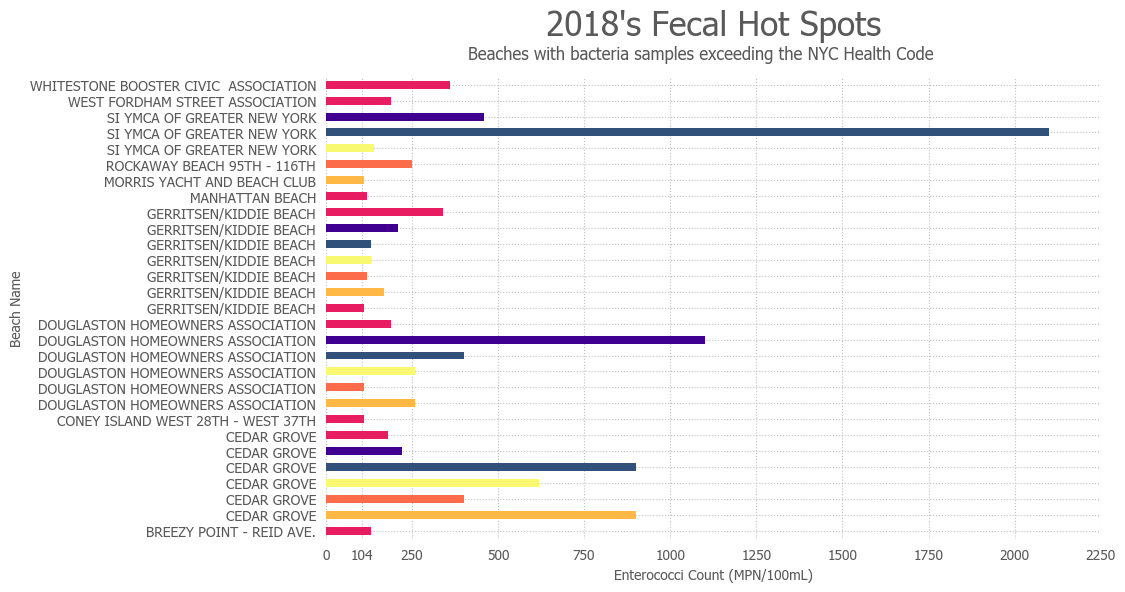

In [19]:
ax = df_2018_nast.sort_values(by='Beach Name').plot(kind='barh', x='Beach Name', y='EnterococciResults', figsize=(10,6))
ax.set_title("2018's Fecal Hot Spots", pad=30, fontsize=24)
ax.legend_.remove()
ax.set_xlabel('Enterococci Count (MPN/100mL)')
plt.gcf().text(0.5, 0.91, "Beaches with bacteria samples exceeding the NYC Health Code", ha='center', fontsize=12) 
#set xtick location at 104, per NYC health code
x_ticks = np.append(ax.get_xticks(), 104)
ax.set_xticks(x_ticks)
plt.savefig("fecal_hot_spots_2.pdf")
plt.show()

In [21]:
df_2018_clean = df_2018[df_2018.EnterococciResults == 0]
df_2018_clean['Beach Name'].value_counts()

ORCHARD BEACH                            27
SEAGATE BEACH - 42ND STREET              22
CEDAR GROVE                              21
MIDLAND BEACH                            20
SEAGATE BEACH - 38TH STREET              19
SCHUYLER HILL CIVIC ASSOCIATION          19
WOLFE'S POND PARK                        19
MORRIS YACHT AND BEACH CLUB              17
WEST FORDHAM STREET ASSOCIATION          17
LOCUST POINT YACHT CLUB                  14
SOUTH BEACH                              14
DANISH AMERICAN BEACH CLUB               12
MANHATTAN BEACH                          12
MANHEM BEACH CLUB                        10
KINGSBOROUGH COMMUNITY COLLEGE           10
AMERICAN TURNERS                          9
CONEY ISLAND OCEAN PKWY - WEST 8TH        8
CONEY ISLAND WEST 28TH - WEST 37TH        8
CONEY ISLAND WEST 8TH - PIER              8
WHITESTONE BOOSTER CIVIC  ASSOCIATION     8
WHITE CROSS FISHING CLUB                  8
SI YMCA OF GREATER NEW YORK               7
TRINITY DANISH YOUNG PEOPLE'S SO

In [22]:
df_2018_nast['colors'] = ['red' if x == 'CEDAR GROVE' else 'green' for x in df_2018_nast['Beach Name']]

/Users/angelawang/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
pivot_df = df_2018_nast.pivot(index='colors', columns='Beach Name', values='EnterococciResults').reset_index().fillna(0)

ValueError: Index contains duplicate entries, cannot reshape

In [24]:
df.groupby('Beach Name').EnterococciResults.max()

Beach Name
AMERICAN TURNERS                           3500.0
BEECHHURST PROPERTY OWNERS ASSOCIATION      660.0
BREEZY POINT - 219TH STREET                2100.0
BREEZY POINT - REID AVE.                    130.0
CEDAR GROVE                                3300.0
CONEY ISLAND BR. 15TH - 6TH                 560.0
CONEY ISLAND BR. 6TH - OCEAN PKWY          3800.0
CONEY ISLAND OCEAN PKWY - WEST 8TH         3100.0
CONEY ISLAND WEST 16TH - WEST 27TH          560.0
CONEY ISLAND WEST 28TH - WEST 37TH         1700.0
CONEY ISLAND WEST 8TH - PIER               1900.0
DANISH AMERICAN BEACH CLUB                 5100.0
DOUGLASTON HOMEOWNERS ASSOCIATION         12000.0
GERRITSEN/KIDDIE BEACH                     4500.0
KINGSBOROUGH COMMUNITY COLLEGE             2300.0
LOCUST POINT CIVIC ASSOCIATION              170.0
LOCUST POINT YACHT CLUB                     740.0
MANHATTAN BEACH                             740.0
MANHEM BEACH CLUB                          2200.0
MIDLAND BEACH                          

In [25]:
df.sort_values(by='Beach Name')

,Sample ID,Sample Date,Beach Name,Sample Location,Enterococci Results,Units or Notes,EnterococciResults,date,year,month
5646,052813GR09,05/28/2013,AMERICAN TURNERS,Right,8.0,MPN/100 ml,8.0,2013-05-28,2013,5
19001,081616JL05,08/16/2016,AMERICAN TURNERS,Center,56.0,MPN/100 ml,56.0,2016-08-16,2016,8
17075,061907BH14,06/19/2007,AMERICAN TURNERS,Center,4.0,MPN/100 ml,4.0,2007-06-19,2007,6
11883,082506BH10,08/25/2006,AMERICAN TURNERS,Left,52.0,MPN/100 ml,52.0,2006-08-25,2006,8
6993,052306IM14,05/23/2006,AMERICAN TURNERS,Center,8.0,MPN/100 ml,8.0,2006-05-23,2006,5
10510,081406BH13,08/14/2006,AMERICAN TURNERS,Left,NaN,Result below detection limit,0.0,2006-08-14,2006,8
3707,052715GR09,05/27/2015,AMERICAN TURNERS,Right,NaN,Result below detection limit,0.0,2015-05-27,2015,5
17085,083111GR09,08/31/2011,AMERICAN TURNERS,Right,24.0,MPN/100 ml,24.0,2011-08-31,2011,8
8792,070808GR09,07/08/2008,AMERICAN TURNERS,Right,4.0,MPN/100 ml,4.0,2008-07-08,2008,7
3714,073013GR08,07/30/2013,AMERICAN TURNERS,Center,NaN,Result below detection limit,0.0,2013-07-30,2013,7


In [26]:
# What about NYC"s most popular beaches? Look at Coney Island & The Rockaways
df_coney_2018 = df_2018[df_2018['Beach Name'].str.contains('CONEY')]

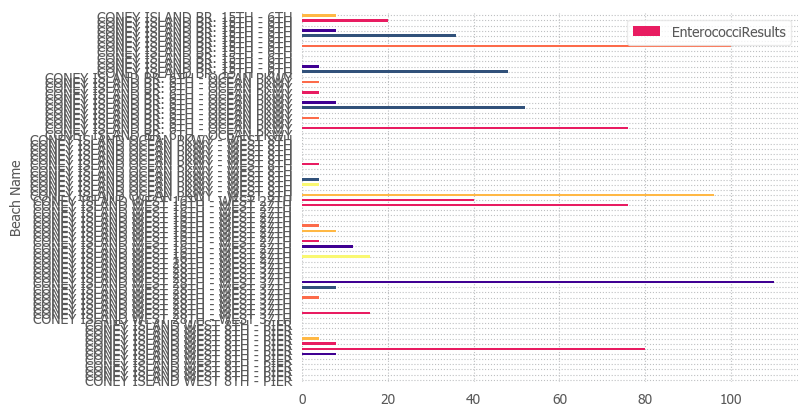

In [27]:
df_coney_2018.sort_values(by='Beach Name', ascending=False).plot(kind='barh', x='Beach Name', y='EnterococciResults')
plt.show()

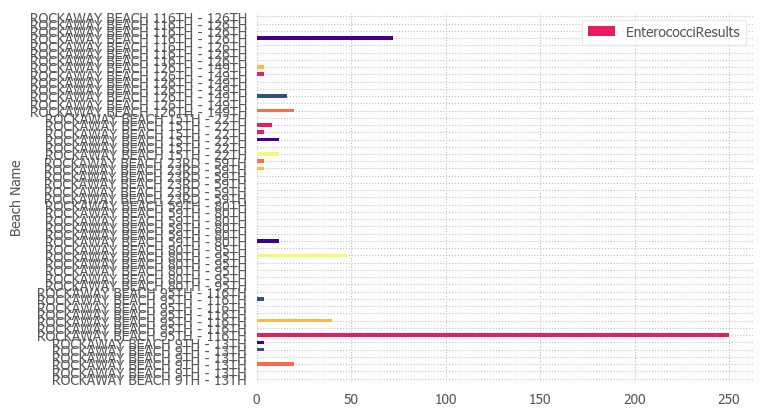

In [28]:
df_rockaway_2018 = df_2018[df_2018['Beach Name'].str.contains('ROCKAWAY')]
df_rockaway_2018.sort_values(by='Beach Name', ascending=False).plot(kind='barh', x='Beach Name', y='EnterococciResults')
plt.show()

In [29]:
# Could clean the above 2 charts up in illustrator, but I'm not sure if bar charts are the way to go here
# since there are many blank areas where no enterococci bacteria was detected
# averages aren't ideal either, but will try them for now

In [30]:
df_coney_2018.groupby('Beach Name').mean().reset_index()

,Beach Name,Enterococci Results,EnterococciResults,year,month
0,CONEY ISLAND BR. 15TH - 6TH,32.000000,18.666667,2018.0,5.5
1,CONEY ISLAND BR. 6TH - OCEAN PKWY,24.666667,12.333333,2018.0,5.5
2,CONEY ISLAND OCEAN PKWY - WEST 8TH,27.000000,9.000000,2018.0,5.5
3,CONEY ISLAND WEST 16TH - WEST 27TH,22.857143,13.333333,2018.0,5.5
4,CONEY ISLAND WEST 28TH - WEST 37TH,34.500000,11.500000,2018.0,5.5
5,CONEY ISLAND WEST 8TH - PIER,25.000000,8.333333,2018.0,5.5


In [31]:
df_rockaway_2018.groupby('Beach Name').mean().reset_index()

,Beach Name,Enterococci Results,EnterococciResults,year,month
0,ROCKAWAY BEACH 116TH - 126TH,72.000000,10.285714,2018.0,5.714286
1,ROCKAWAY BEACH 126TH - 149TH,11.000000,6.285714,2018.0,5.714286
2,ROCKAWAY BEACH 15TH - 22TH,9.000000,6.000000,2018.0,5.500000
3,ROCKAWAY BEACH 23RD - 59TH,4.000000,1.333333,2018.0,5.500000
4,ROCKAWAY BEACH 59TH - 80TH,12.000000,2.000000,2018.0,5.500000
5,ROCKAWAY BEACH 80TH - 95TH,48.000000,8.000000,2018.0,5.500000
6,ROCKAWAY BEACH 95TH - 116TH,98.000000,42.000000,2018.0,5.714286
7,ROCKAWAY BEACH 9TH - 13TH,9.333333,4.666667,2018.0,5.500000


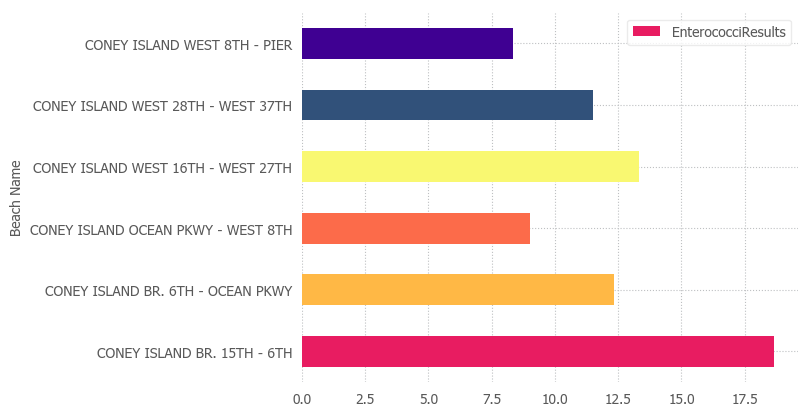

In [32]:
#fig, ax = plt.subplots()
df_coney_2018.groupby('Beach Name').mean().plot(kind='barh', y='EnterococciResults') #ax=ax)
plt.show()

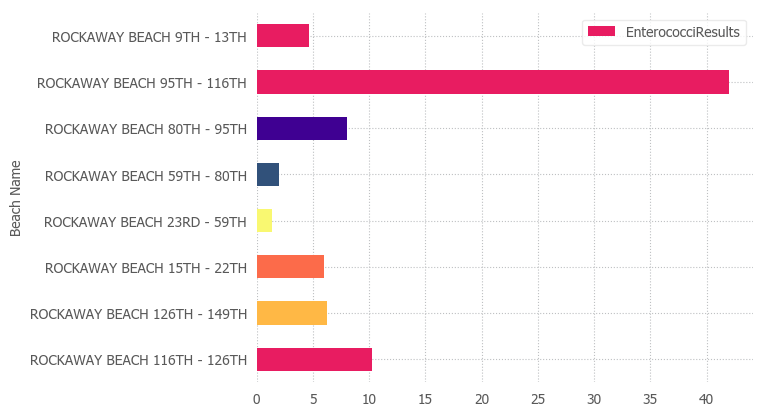

In [33]:
df_rockaway_2018.groupby('Beach Name').mean().plot(kind='barh', y='EnterococciResults')
plt.show()

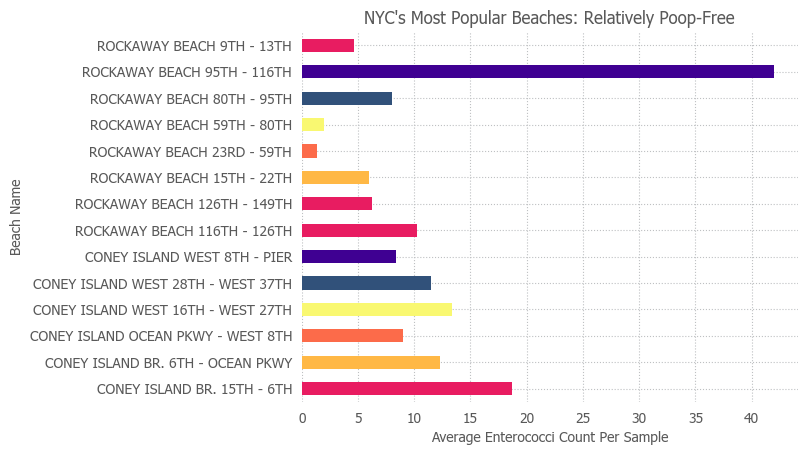

In [34]:
df_coney_rockaway_2018 = df_2018[df_2018['Beach Name'].str.contains('CONEY') | df_2018['Beach Name'].str.contains('ROCKAWAY')]
ax = df_coney_rockaway_2018.groupby('Beach Name').mean().plot(kind='barh', y='EnterococciResults', title="NYC's Most Popular Beaches: Relatively Poop-Free")
ax.set_xlabel('Average Enterococci Count Per Sample')
ax.legend_.remove()
plt.show()

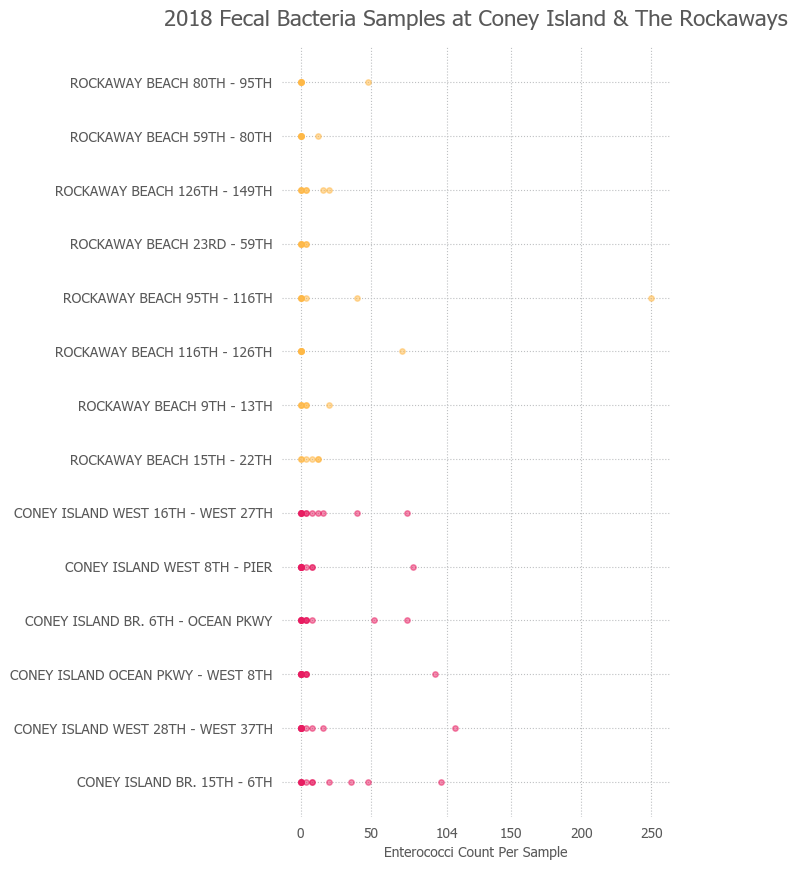

In [94]:
fig, ax = plt.subplots(figsize=(5,10))

ax.scatter(df_coney_2018.EnterococciResults, df_coney_2018['Beach Name'], s=15, alpha=0.5)
ax.scatter(df_rockaway_2018.EnterococciResults, df_rockaway_2018['Beach Name'], s=15, alpha=0.5)
ax.set_title("2018 Fecal Bacteria Samples at Coney Island & The Rockaways", pad=15, size='16')
ax.set_xlabel('Enterococci Count Per Sample')
ax.set_xticks([0, 50, 104, 150, 200, 250])
plt.savefig("coney_rockaways_2.pdf")
plt.show()

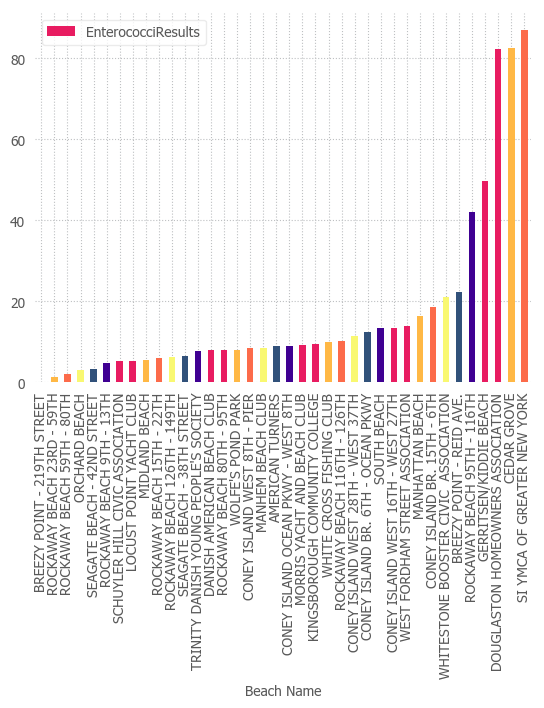

In [36]:
df_2018.groupby('Beach Name').mean().sort_values(by='EnterococciResults', ascending=True).plot(kind='bar', y='EnterococciResults')
plt.show()

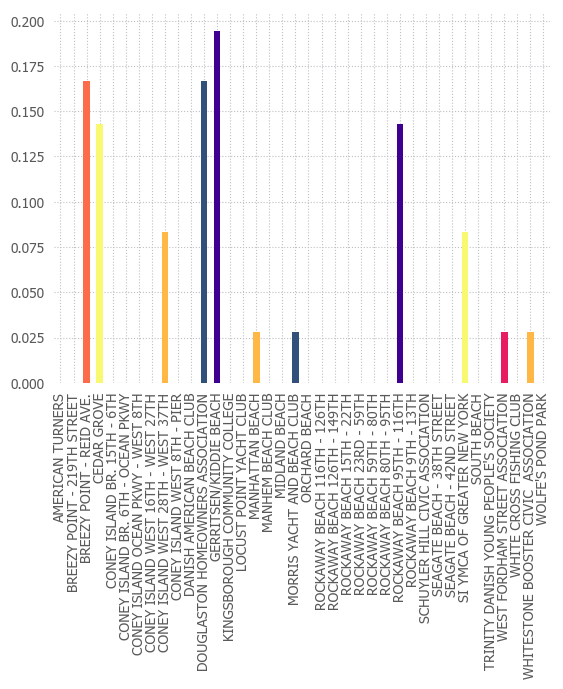

In [37]:
# What percent of samples had bacteria counts exceeding health code?
#df_2018_nast['Beach Name'].value_counts() / df_2018['Beach Name'].value_counts()
(df_2018_nast['Beach Name'].value_counts() / df_2018['Beach Name'].value_counts()).plot(kind='bar')
plt.show()

In [38]:
df

,Sample ID,Sample Date,Beach Name,Sample Location,Enterococci Results,Units or Notes,EnterococciResults,date,year,month
0,050514CP13,05/05/2014,MIDLAND BEACH,Center,20.0,MPN/100 ml,20.0,2014-05-05,2014,5
1,062011GR04,06/20/2011,MANHATTAN BEACH,Left,NaN,Result below detection limit,0.0,2011-06-20,2011,6
2,072808BH09,07/28/2008,MIDLAND BEACH,Right,28.0,MPN/100 ml,28.0,2008-07-28,2008,7
3,051214CP36,05/12/2014,SOUTH BEACH,Right,4.0,MPN/100 ml,4.0,2014-05-12,2014,5
4,081511KB07,08/15/2011,CEDAR GROVE,Left,360.0,MPN/100 ml,360.0,2011-08-15,2011,8
5,062909KB01,06/29/2009,MANHATTAN BEACH,Left,8.0,MPN/100 ml,8.0,2009-06-29,2009,6
6,082112KB07,08/21/2012,CEDAR GROVE,Left,20.0,MPN/100 ml,20.0,2012-08-21,2012,8
7,072015GR06,07/20/2015,MANHATTAN BEACH,Right,NaN,Result below detection limit,0.0,2015-07-20,2015,7
8,082613CP16,08/26/2013,SOUTH BEACH,Center,12.0,MPN/100 ml,12.0,2013-08-26,2013,8
9,081709KB07,08/17/2009,MIDLAND BEACH,Left,4.0,MPN/100 ml,4.0,2009-08-17,2009,8


In [39]:
df.month.value_counts()
#df.head()

8     4784
6     4700
7     4648
5     4509
4     1364
9     1035
10       3
Name: month, dtype: int64

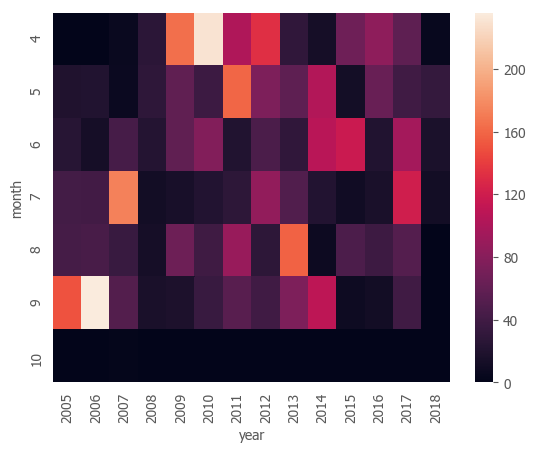

In [43]:
# heatmap of average enterococci count per month, by year
pivot = df.pivot_table(index="month",columns="year",values="EnterococciResults", aggfunc="mean").fillna(0)
sns.heatmap(pivot, annot=None)
plt.show()

In [44]:
#reoriented plot above
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(pivot, ax=ax,
                cbar_ax=cbar_ax,
                cbar_kws={"orientation": "horizontal"})

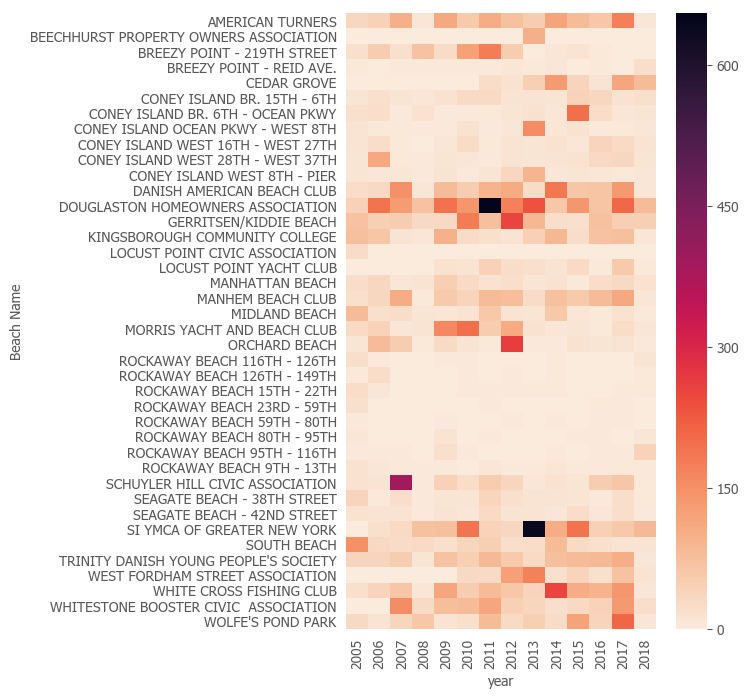

In [85]:
# yearly average for each beach
pivot2 = df.pivot_table(index="Beach Name",columns="year",values="EnterococciResults", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmap = sns.cm.rocket_r
sns.heatmap(pivot2, annot=None, cmap=cmap)
plt.savefig("beach_yearly_heatmap.pdf")
plt.show()

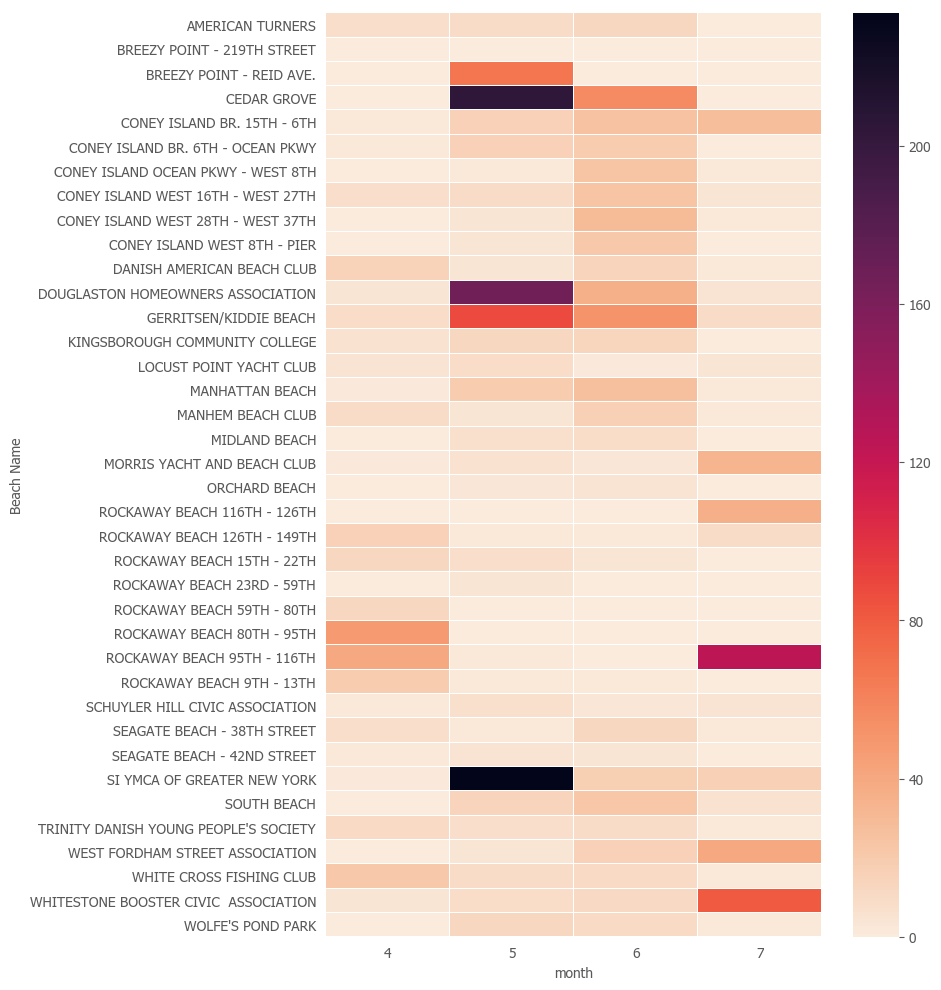

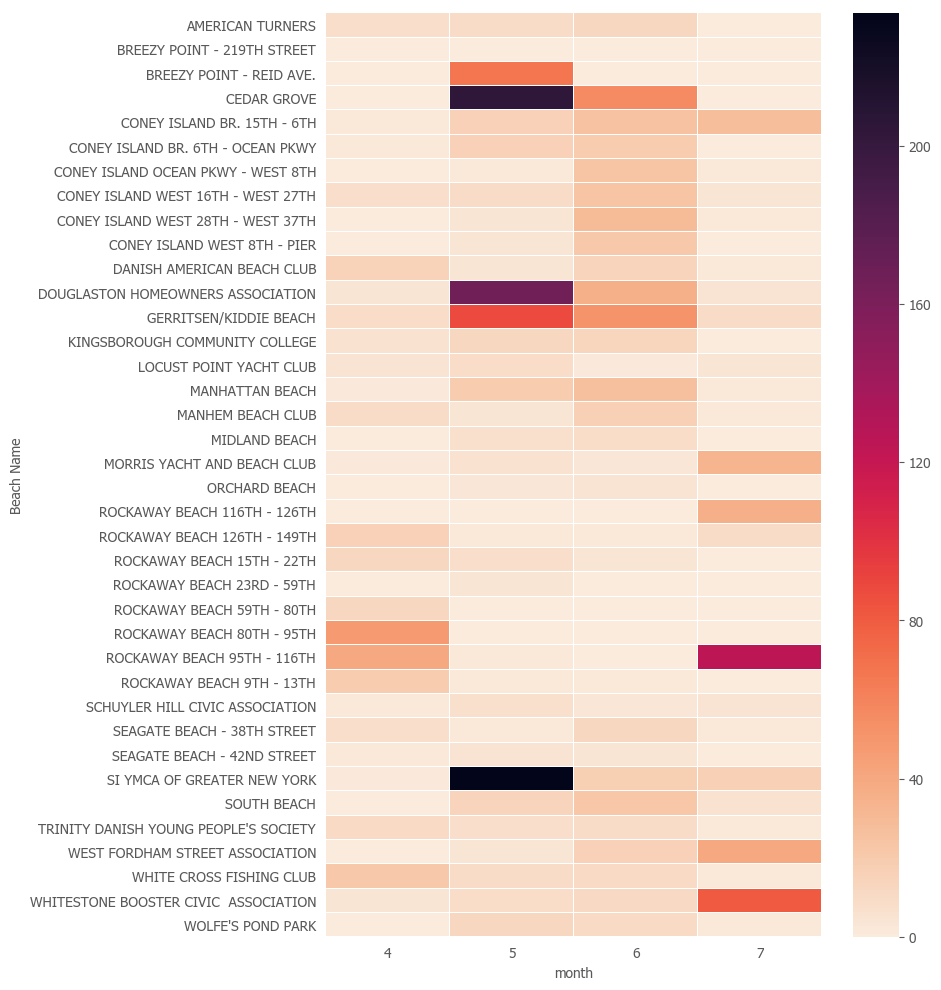

In [81]:
pivot_2018 = df_2018.pivot_table(index="Beach Name",columns="month",values="EnterococciResults").fillna(0)
plt.figure(figsize=(8, 12))
cmap = sns.cm.rocket_r
ax = sns.heatmap(pivot_2018, annot=None, linewidths=.01, cmap=cmap)
plt.savefig('beach_2018_heatmap.pdf')
plt.show()

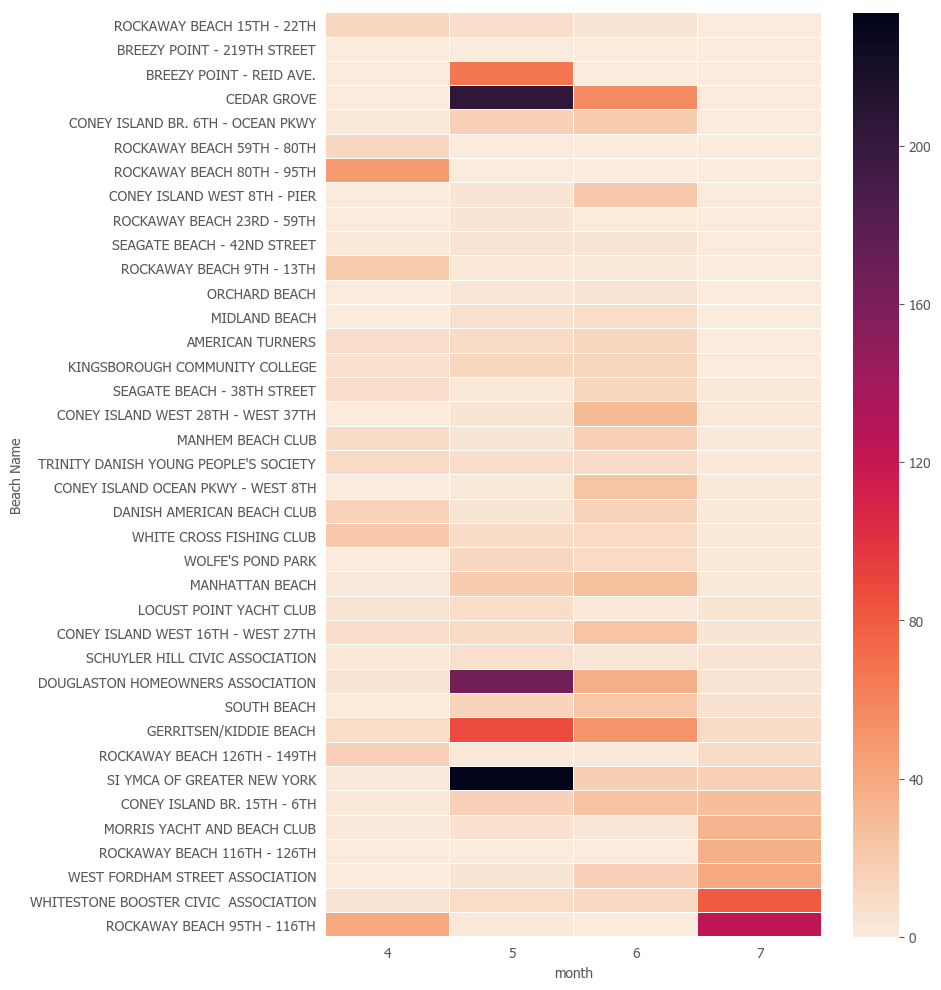

In [71]:
#Same map as directly above, but sorted from best to worst for July data
plt.figure(figsize=(8, 12))
cmap = sns.cm.rocket_r
ax = sns.heatmap(pivot_2018.sort_values(by=7), annot=None, linewidths=.01, cmap=cmap)
plt.show()

In [78]:
df_2018.sort_values(by='EnterococciResults', ascending=False)

,Sample ID,Sample Date,Beach Name,Sample Location,Enterococci Results,Units or Notes,EnterococciResults,date,year,month
20356,050718DF04,05/07/2018,SI YMCA OF GREATER NEW YORK,Left,2100.0,MPN/100 ml,2100.0,2018-05-07,2018,5
20440,CP1805220600-1.2,05/22/2018,DOUGLASTON HOMEOWNERS ASSOCIATION,Center,1100.0,MPN/100 ml,1100.0,2018-05-22,2018,5
20222,DF05141812,05/14/2018,CEDAR GROVE,Right,900.0,MPN/100 ml,900.0,2018-05-14,2018,5
20304,DF05141811,05/14/2018,CEDAR GROVE,Center,900.0,MPN/100 ml,900.0,2018-05-14,2018,5
20280,DF05141810,05/14/2018,CEDAR GROVE,Left,620.0,MPN/100 ml,620.0,2018-05-14,2018,5
20265,050718DF05,05/07/2018,SI YMCA OF GREATER NEW YORK,Center,460.0,MPN/100 ml,460.0,2018-05-07,2018,5
20685,DF06111807,06/11/2018,CEDAR GROVE,Left,400.0,MPN/100 ml,400.0,2018-06-11,2018,6
20536,CP1805300800-1.2,05/30/2018,DOUGLASTON HOMEOWNERS ASSOCIATION,Center,400.0,MPN/100 ml,400.0,2018-05-30,2018,5
21027,CP1807100800-1.2,07/10/2018,WHITESTONE BOOSTER CIVIC ASSOCIATION,Center,360.0,MPN/100 ml,360.0,2018-07-10,2018,7
20339,CP05141803,05/14/2018,GERRITSEN/KIDDIE BEACH,Right,340.0,MPN/100 ml,340.0,2018-05-14,2018,5


In [96]:
df_coney_2018

,Sample ID,Sample Date,Beach Name,Sample Location,Enterococci Results,Units or Notes,EnterococciResults,date,year,month
20110,CP1804300900-1.1,04/30/2018,CONEY ISLAND BR. 15TH - 6TH,Center,4.0,MPN/100 ml,4.0,2018-04-30,2018,4
20128,DF05141802,05/14/2018,CONEY ISLAND WEST 28TH - WEST 37TH,Center,16.0,MPN/100 ml,16.0,2018-05-14,2018,5
20161,CP05141812,05/14/2018,CONEY ISLAND OCEAN PKWY - WEST 8TH,Center,NaN,Result below detection limit,0.0,2018-05-14,2018,5
20166,CP05141811,05/14/2018,CONEY ISLAND BR. 6TH - OCEAN PKWY,Center,4.0,MPN/100 ml,4.0,2018-05-14,2018,5
20176,CP05141810,05/14/2018,CONEY ISLAND BR. 15TH - 6TH,Center,20.0,MPN/100 ml,20.0,2018-05-14,2018,5
20194,CP1804231040-1.1,04/23/2018,CONEY ISLAND OCEAN PKWY - WEST 8TH,Center,NaN,Result below detection limit,0.0,2018-04-23,2018,4
20244,050718DF18,05/07/2018,CONEY ISLAND WEST 28TH - WEST 37TH,Center,NaN,Result below detection limit,0.0,2018-05-07,2018,5
20254,CP1804300915-1.1,04/30/2018,CONEY ISLAND BR. 6TH - OCEAN PKWY,Center,NaN,Result below detection limit,0.0,2018-04-30,2018,4
20269,CP05141813,05/14/2018,CONEY ISLAND WEST 8TH - PIER,Center,8.0,MPN/100 ml,8.0,2018-05-14,2018,5
20275,JA1804230714-2.1,04/23/2018,CONEY ISLAND WEST 28TH - WEST 37TH,Center,NaN,Result below detection limit,0.0,2018-04-23,2018,4
